<a href="https://colab.research.google.com/github/Heinkek-99/11/blob/master/Projet_Analyse_des_donn%C3%A9es_avec_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Projet réalisé par Hermann NGATAT, Heidy KENGNE, Syprien Donkeng.


In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
# Importation des bibliothèque dans notre environnement.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  I. Chargement, nettoyage et manipulation des données avec Panda
    *   Charger un jeu de données (par exemple, à partir d’un fichier CSV ou d'une API)
    *   Nettoyer les données : traiter les valeurs manquantes, supprimer les doublons et traiter les données catégorielles.
    *   Appliquer des transformations de données si nécessaire (scaling, encoding, etc.).
    *   Utiliser Pandas pour manipuler les données et préparer les variables pour l’analyse.



In [ ]:
#1 Chargement, nettoyage et manipulation des données avec Pandas

In [ ]:
a = pd.read_csv('/content/sample_data/titanic.csv', delimiter=',')


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Lname        156 non-null    object 
 4   Name         156 non-null    object 
 5   Sex          156 non-null    object 
 6   Age          126 non-null    float64
 7   SibSp        156 non-null    int64  
 8   Parch        156 non-null    int64  
 9   Ticket       156 non-null    object 
 10  Fare         156 non-null    float64
 11  Cabin        31 non-null     object 
 12  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 16.0+ KB


In [ ]:
#Dimension du dataset
print({a.shape})

{(156, 13)}


In [ ]:
#verification de doublons
a.duplicated().sum()

0

In [ ]:
#Verification des valeurs manquantes
a.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Lname,0
Name,0
Sex,0
Age,30
SibSp,0
Parch,0
Ticket,0


In [ ]:
# Nettoyage des données
# 1. Traitement des valeurs manquantes
# Remplacement des valeurs manquantes dans 'Age' par la médiane
a['Age'].fillna(a['Age'].median(), inplace=True)

<ipython-input-17-2230ded24a2c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a['Age'].fillna(a['Age'].median(), inplace=True)


In [ ]:
print(a)

     PassengerId  Survived  Pclass         Lname  \
0              1         0       3        Braund   
1              2         1       1       Cumings   
2              3         1       3     Heikkinen   
3              4         1       1      Futrelle   
4              5         0       3         Allen   
..           ...       ...     ...           ...   
151          152         1       1         Pears   
152          153         0       3           Meo   
153          154         0       3  van Billiard   
154          155         0       3         Olsen   
155          156         0       1      Williams   

                                            Name     Sex   Age  SibSp  Parch  \
0                                Mr. Owen Harris    male  22.0      1      0   
1     Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0   
2                                    Miss. Laina  female  26.0      0      0   
3             Mrs. Jacques Heath (Lily May Peel)  femal

In [ ]:
a.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Lname,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0


In [ ]:
# Nettoyage des données
# 1. Traitement des valeurs manquantes
# Remplacement des valeurs manquantes dans 'Cabin' par la valeur inconnu
a['Cabin'].fillna('Inconnu', inplace=True)

<ipython-input-20-ed6dfac06dbb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a['Cabin'].fillna('Inconnu', inplace=True)


In [ ]:
# Remplacer les valeurs manquantes dans 'Embarked' par la valeur la plus fréquente
mode_embarked = a['Embarked'].mode()[0]
a['Embarked'].fillna(mode_embarked, inplace=True)

<ipython-input-21-0bb4483f9237>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a['Embarked'].fillna(mode_embarked, inplace=True)


In [ ]:
# Affichage des résultats après remplacement des valeurs manquantes
print("Valeurs manquantes après remplacement :")
print(a.isnull().sum())

Valeurs manquantes après remplacement :
PassengerId    0
Survived       0
Pclass         0
Lname          0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
#Visualisation des valeurs importées du dataset
a

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,Inconnu,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,Inconnu,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,Inconnu,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,Inconnu,S
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,Inconnu,S
154,155,0,3,Olsen,Mr. Ole Martin,male,26.0,0,0,Fa 265302,7.3125,Inconnu,S


In [ ]:
#Application de la transformation des données avec l'encoding

In [ ]:
# Encodage de la variable 'Sex'
a['Sex'] = a['Sex'].map({'male': 0, 'female': 1})


In [ ]:
# Encodage de la variable 'Embarked'
a = pd.get_dummies(a, columns=['Embarked'], drop_first=True)

In [ ]:
# Normalisation de la colonne 'Fare'pour avoir des valeurs standard
a['Fare'] = (a['Fare'] - a['Fare'].mean()) / a['Fare'].std()

In [ ]:
# Affichage des statistiques descriptives
print("Statistiques descriptives :")
print(a.describe())



Statistiques descriptives :
       PassengerId    Survived      Pclass         Sex         Age  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean     78.500000    0.346154    2.423077    0.358974   27.729679   
std      45.177428    0.477275    0.795459    0.481245   13.150938   
min       1.000000    0.000000    1.000000    0.000000    0.830000   
25%      39.750000    0.000000    2.000000    0.000000   21.000000   
50%      78.500000    0.000000    3.000000    0.000000   26.000000   
75%     117.250000    1.000000    3.000000    1.000000   33.000000   
max     156.000000    1.000000    3.000000    1.000000   71.000000   

            SibSp       Parch          Fare  
count  156.000000  156.000000  1.560000e+02  
mean     0.615385    0.397436 -4.270089e-17  
std      1.056235    0.870146  1.000000e+00  
min      0.000000    0.000000 -5.421071e-01  
25%      0.000000    0.000000 -5.103021e-01  
50%      0.000000    0.000000 -3.465742e-01  
75%      1.000000  

In [ ]:
# Affichage des colonnes finales
print("Colonnes finales après nettoyage :")
print(a.columns)

Colonnes finales après nettoyage :
Index(['PassengerId', 'Survived', 'Pclass', 'Lname', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [ ]:
#Valeurs finale
a

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund,Mr. Owen Harris,0,22.0,1,0,A/5 21171,-0.529417,Inconnu,False,True
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),1,38.0,1,0,PC 17599,1.095750,C85,False,False
2,3,1,3,Heikkinen,Miss. Laina,1,26.0,0,0,STON/O2. 3101282,-0.512286,Inconnu,False,True
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,0.634258,C123,False,True
4,5,0,3,Allen,Mr. William Henry,0,35.0,0,0,373450,-0.509113,Inconnu,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),1,22.0,1,0,113776,0.976888,C2,False,True
152,153,0,3,Meo,Mr. Alfonzo,0,55.5,0,0,A.5. 11206,-0.509113,Inconnu,False,True
153,154,0,3,van Billiard,Mr. Austin Blyler,0,40.5,0,2,A/5. 851,-0.345412,Inconnu,False,True
154,155,0,3,Olsen,Mr. Ole Martin,0,26.0,0,0,Fa 265302,-0.527831,Inconnu,False,True


# 2. Détection des valeurs aberrantes et des points influents


In [ ]:
# Sélection des colonnes numériques pour détecter les valeurs aberrantes
numerical_cols = a.select_dtypes(include=np.number).columns

# Calcul de l'IQR pour chaque colonne numérique
Q1 = a[numerical_cols].quantile(0.25)
Q3 = a[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identification des valeurs aberrantes (moins de Q1 - 1.5 * IQR ou plus de Q3 + 1.5 * IQR)
outliers = ((a[numerical_cols] < (Q1 - 1.5 * IQR)) | (a[numerical_cols] > (Q3 + 1.5 * IQR)))

# Compte des valeurs aberrantes par colonne
outliers_count = outliers.sum()

# Résultat
outliers_count


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,14
SibSp,12
Parch,35
Fare,15


In [ ]:
#Avant le capping

a[['Age', 'SibSp', 'Parch', 'Fare']].describe()

,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,1.560000e+02
mean,27.729679,0.615385,0.397436,-4.270089e-17
std,13.150938,1.056235,0.870146,1.000000e+00
min,0.830000,0.000000,0.000000,-5.421071e-01
25%,21.000000,0.000000,0.000000,-5.103021e-01
50%,26.000000,0.000000,0.000000,-3.465742e-01
75%,33.000000,1.000000,0.000000,5.741631e-02
max,71.000000,5.000000,5.000000,5.961527e+00


In [ ]:
# Application du capping pour limiter les valeurs aberrantes
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    a[col] = np.where(a[col] < lower_bound, lower_bound, a[col])
    a[col] = np.where(a[col] > upper_bound, upper_bound, a[col])

# Vérification après capping
a[['Age', 'SibSp', 'Parch', 'Fare']].describe()


,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.0,156.000000
mean,27.134615,0.525641,0.0,-0.130512
std,11.516796,0.786570,0.0,0.487885
min,3.000000,0.000000,0.0,-0.542107
25%,21.000000,0.000000,0.0,-0.510302
50%,26.000000,0.000000,0.0,-0.346574
75%,33.000000,1.000000,0.0,0.057416
max,51.000000,2.500000,0.0,0.908994


# 3. Transformation des données


In [ ]:
# Identifier les variables numériques
numeric_cols = a.select_dtypes(include=['float64', 'int64']).columns

# Calculer l'asymétrie (skewness) des variables
skewness = a[numeric_cols].skew()
print("Asymétrie initiale :\n", skewness)

# Appliquer les transformations
for col in numeric_cols:
    if skewness[col] > 0.75:  # Seulement pour les colonnes fortement asymétriques
        if (a[col] > 0).all():  # Vérifier que toutes les valeurs sont positives
            # Transformation log si applicable
            a[col + '_log'] = np.log(a[col])
        else:
            # Transformation Box-Cox
            a[col + '_boxcox'], _ = boxcox(a[col] + 1 - a[col].min())

# Vérifier la nouvelle asymétrie après transformation
transformed_cols = [col for col in a.columns if col.endswith('_log') or col.endswith('_boxcox')]
new_skewness = a[transformed_cols].skew()
print("Nouvelle asymétrie :\n", new_skewness)


Asymétrie initiale :
 PassengerId    0.000000
Survived       0.653058
Pclass        -0.912744
Sex            0.593699
Age            0.304610
SibSp          1.364713
Parch          0.000000
Fare           1.161352
dtype: float64
Nouvelle asymétrie :
 SibSp_boxcox    0.579605
Fare_boxcox     0.363527
dtype: float64


# 4. Analyse de régression avancée


In [ ]:
a

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,SibSp_boxcox,Fare_boxcox
0,1,0,3,Braund,Mr. Owen Harris,0,22.0,1.0,0.0,A/5 21171,-0.529417,Inconnu,False,True,0.375179,0.012438
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),1,38.0,1.0,0.0,PC 17599,0.908994,C85,False,False,0.375179,0.393833
2,3,1,3,Heikkinen,Miss. Laina,1,26.0,0.0,0.0,STON/O2. 3101282,-0.512286,Inconnu,False,True,0.000000,0.028464
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),1,35.0,1.0,0.0,113803,0.634258,C123,False,True,0.375179,0.374599
4,5,0,3,Allen,Mr. William Henry,0,35.0,0.0,0.0,373450,-0.509113,Inconnu,False,True,0.000000,0.031340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),1,22.0,1.0,0.0,113776,0.908994,C2,False,True,0.375179,0.393833
152,153,0,3,Meo,Mr. Alfonzo,0,51.0,0.0,0.0,A.5. 11206,-0.509113,Inconnu,False,True,0.000000,0.031340
153,154,0,3,van Billiard,Mr. Austin Blyler,0,40.5,0.0,0.0,A/5. 851,-0.345412,Inconnu,False,True,0.000000,0.148598
154,155,0,3,Olsen,Mr. Ole Martin,0,26.0,0.0,0.0,Fa 265302,-0.527831,Inconnu,False,True,0.000000,0.013959


In [ ]:
# Sélectionner les variables explicatives (X) et la variable cible (y)
X = a[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare_boxcox']].dropna()  # Prendre les variables numériques et non manquantes
y = a.loc[X.index, 'Survived']  # Filtrer pour correspondre à X

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les coefficients du modèle
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

print("Coefficients du modèle :")
print(coefficients)

print("\nErreur quadratique moyenne (MSE) :", mse)
print("Coefficient de détermination (R^2) :", r2)


Coefficients du modèle :
       Feature  Coefficient
0       Pclass    -0.088286
1          Age    -0.007094
2        SibSp    -0.045235
3        Parch     0.000000
4  Fare_boxcox    -0.065529

Erreur quadratique moyenne (MSE) : 0.2267084547708841
Coefficient de détermination (R^2) : 0.05864854024646027




# 5. Visualisation des résultats avec matplotlib et Plotly


In [ ]:
#5.1 - Visualisation des résultats avec Mathplotlib

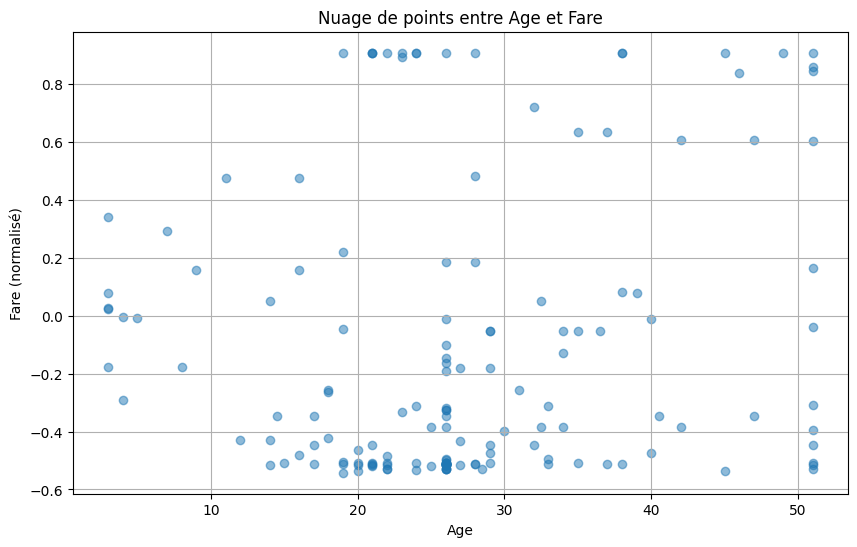

In [ ]:
#Nuage de points entre 'Age' et 'Fare'
plt.figure(figsize=(10, 6))
plt.scatter(a['Age'], a['Fare'], alpha=0.5)
plt.title('Nuage de points entre Age et Fare')
plt.xlabel('Age')
plt.ylabel('Fare (normalisé)')
plt.grid()
plt.show()

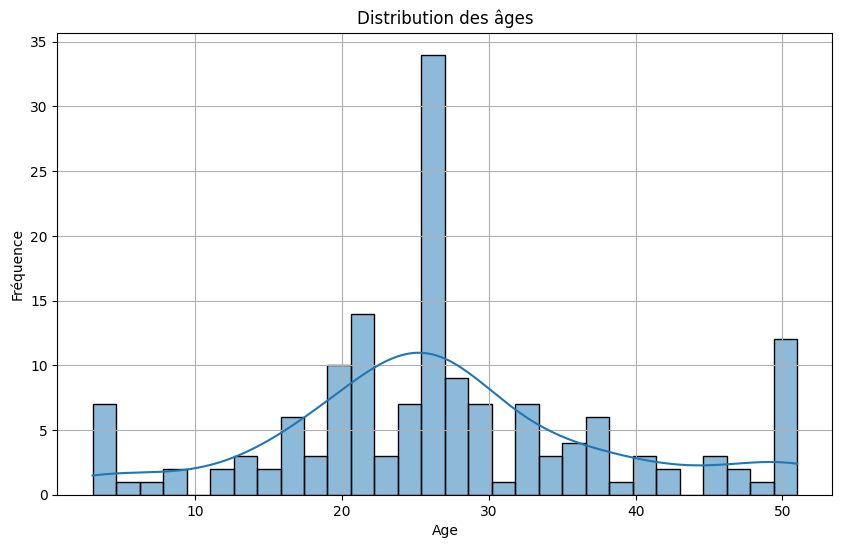

In [ ]:
#Histogramme de la distribution des âges
plt.figure(figsize=(10, 6))
sns.histplot(a['Age'], bins=30, kde=True)
plt.title('Distribution des âges')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.grid()
plt.show()

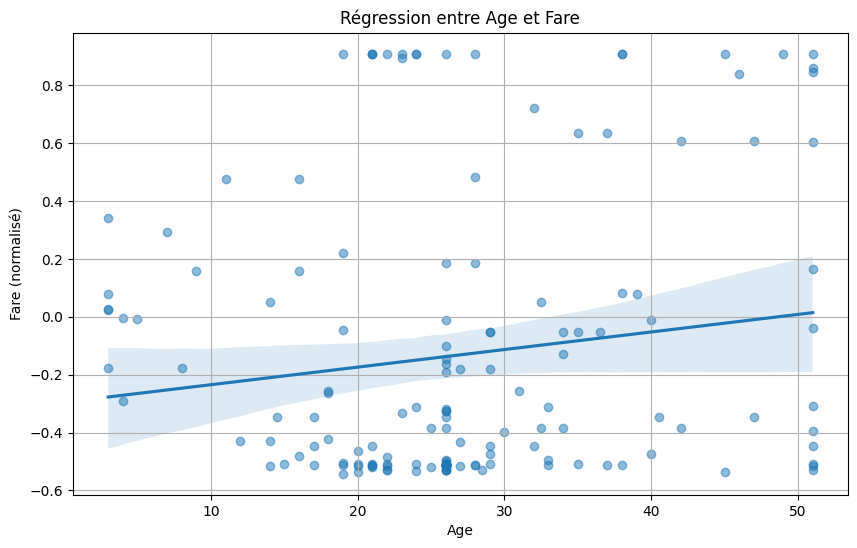

In [ ]:
#Courbe de régression
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Fare', data=a, scatter_kws={'alpha':0.5})
plt.title('Régression entre Age et Fare')
plt.xlabel('Age')
plt.ylabel('Fare (normalisé)')
plt.grid()
plt.show()

In [ ]:
#5.2 - Visualisation des résultats avec Ploty

In [ ]:
#Importation de la bibliothèque ploty
import plotly.express as px


In [ ]:
#Nuage de points entre 'Age' et 'Fare' avec Plotly
fig1 = px.scatter(a, x='Age', y='Fare', title='Nuage de points entre Age et Fare')
fig1.show()

In [ ]:
#Histogramme de la distribution des âges avec Plotly
fig2 = px.histogram(a, x='Age', nbins=30, title='Distribution des âges', marginal='rug')
fig2.show()

In [ ]:
#Courbe de régression avec Plotly
fig3 = px.scatter(a, x='Age', y='Fare', title='Régression entre Age et Fare', trendline='ols')
fig3.show()

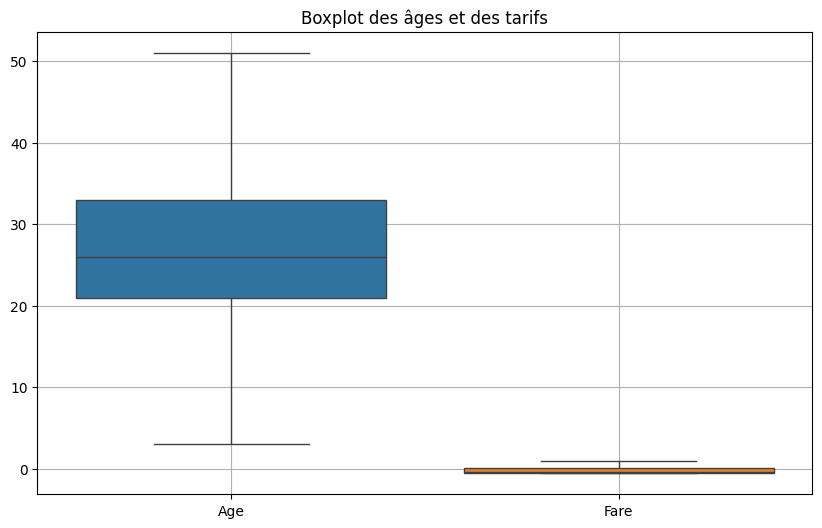

In [ ]:
# Visualisation des valeurs aberrantes
plt.figure(figsize=(10, 6))
sns.boxplot(data=a[['Age', 'Fare']])
plt.title('Boxplot des âges et des tarifs')
plt.grid()
plt.show()

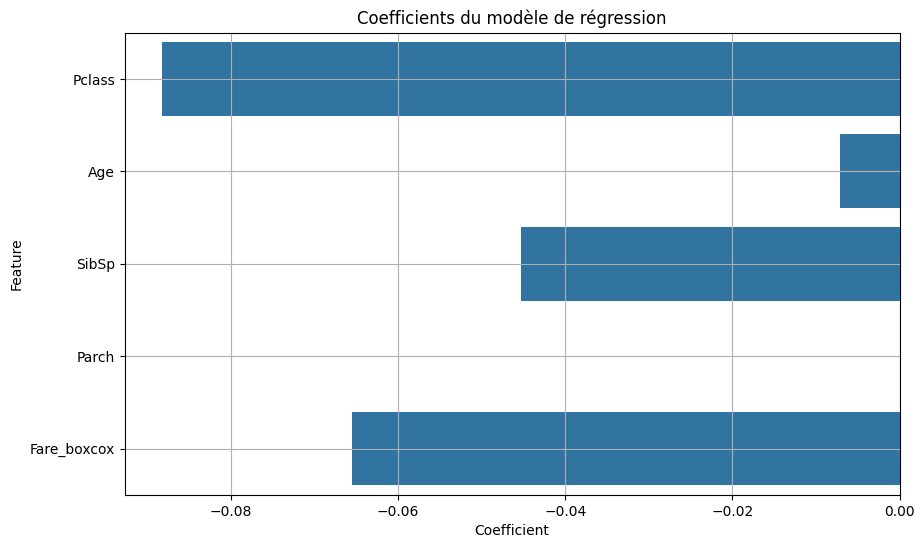

In [ ]:
# Visualisation des coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Coefficients du modèle de régression')
plt.grid()
plt.show()

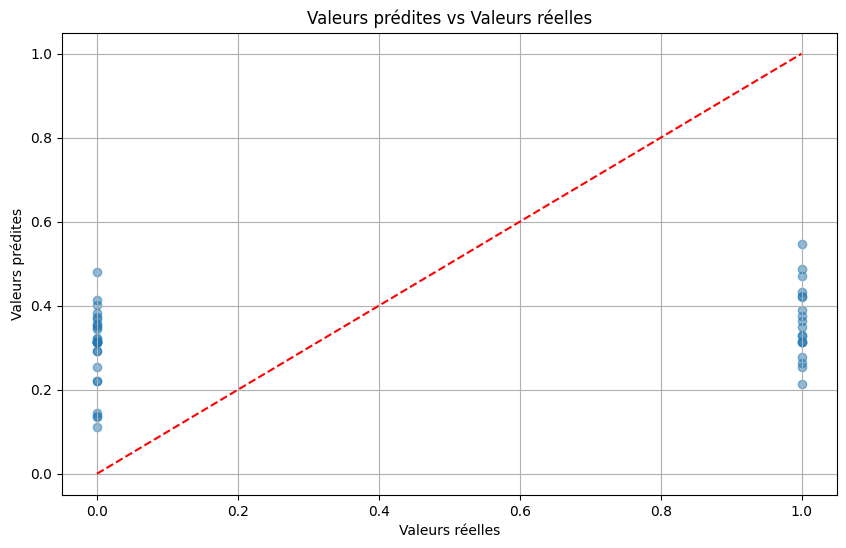

In [ ]:
# Comparaison des valeurs prédites et réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Valeurs prédites vs Valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.grid()
plt.show()


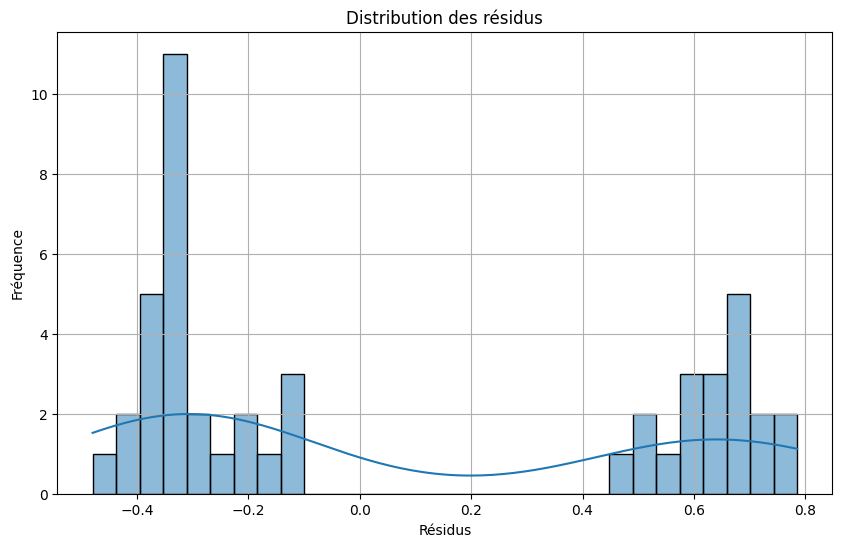

In [ ]:
# Calcul des résidus
residuals = y_test - y_pred

# Visualisation des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.grid()
plt.show()


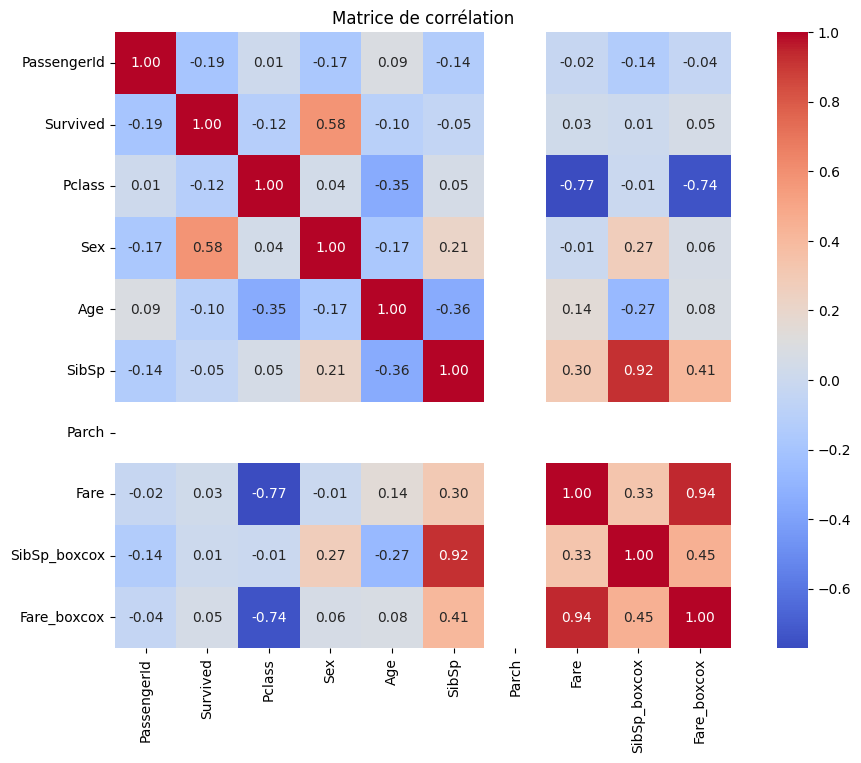

In [ ]:
# Sélection des colonnes numériques
numerical_cols = a.select_dtypes(include=[np.number])

# Matrice de corrélation
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de corrélation')
plt.show()
